 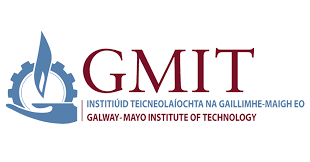

# Fundamentals for Data Analysis Project 2020


**Author:**  Richard Deegan 
 
 
 **Lecturer:** Ian McLoughlin
 
 **Student ID:** G00387896@gmit.ie

# Problem Statement:

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on [Moodle](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv). The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.


2. In that notebook, an explanation of your regression and an analysis of its accuracy.


3. Standard items in a git repository such as a README.

A full set of instructions can be found [here](https://github.com/Deego88/FoDA_Project_2020/blob/master/Images_FoDA_Project_2020/FoDA_Project_2020.pdf)

# Preliminaries

In order to effectively answer the Problem Statement various relevant libraries must be imported. For this we will import Numpy as it contains essential libraries. Pandas to assist with data analysis and manipulation. Matplotlib.plyplot and Seaborn libraries will be utilised to assist in the visualisation of numbers to user friendly graphs.



In [22]:
# import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

The magic inline command will be utilised in order to ensure the correct display of the plots within the Jupyter Notebook. This will allow the plots to be rendered inline within the Notebook [1].

In [23]:
# magic command used to visualise plots in Jupyter
%matplotlib inline

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in. The plot aesthetics will be set from the outset in order to standardise the format [2].

In [24]:
# setting the style of the graphs to be displayed (colour and size)
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Introduction

Regression analysis is a conceptually simple method for investigating functional relationships amoung variables. For example a real estate appraiser may wish to conduct an analysis on the relationship between the sale price of a house and from selected physical characteristics of the house. The relationships are expressed in the form of an equation which connects  the response or dependent variable and one or more explanatory or predictor variables. In this instance the dependent variable would be sale price of them home, as this is dependent on the other variables, this might be the square foot size for example [3].

It will also give you other statistics (including a p-value and a correlation coefficient) to tell you how accurate your model is. A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. Also, the Correlation coefficients are used to measure how strong a relationship is between two variables [4].

**Choosing a Linear Regression Analysis**

In most statistical packages, a curve estimation procedure produces curve estimation regression statistics and related plots for many different models (linear, logarithmic, inverse, quadratic, cubic, power, S-curve, logistic, exponential etc.). It is essential to plot the data in order to determine which model to use for each depedent variable. If the variables appear to be related linearly, a simple linear regression model can be used but in the case that the variables are not linearly related, data transformation might help. If the transformation does not help then a more complicated model may be needed. It is strongly advised to view early a scatterplot of your data; if the plot resembles a mathematical function you recognize, fit the data to that type of model. For example, if the data resemble an exponential function, an exponential model is to be used. Alternatively, if it is not obvious which model best fits the data, an option is to try several models and select among them. It is strongly recommended to screen the data graphically (e.g. by a scatterplot) in order to determine how the independent and dependent variables are related (linearly, exponentially etc.) [5, 6]

# First Look at the data

In [25]:
# Import CSV data set from moodle link
wind_turbine_dataset = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
wind_turbine_dataset

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [26]:
# conduct visual inspection of full data set
pd.set_option('display.max_rows', None)
wind_turbine_dataset

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [27]:
# check if there are any null values in the data set
wind_turbine_dataset.isnull().sum()

speed    0
power    0
dtype: int64

In [28]:
# brief describtion of data set
wind_turbine_dataset.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


**Comments on the description**


From the initial observations of the data set we can see that we have 500 data points for both speed and power. The mean of the power is circa 4 x that of speed. The standard deviation for power is 41.61 this indicates that there is a large spread in the power data, while the speed has a standard deviation of 7.22. The data set contains no negative values as the min value is 0 for both speed and power. 

**Visualise the data** 

Text(0.5, 0.98, 'Wind Turbine Dataset')

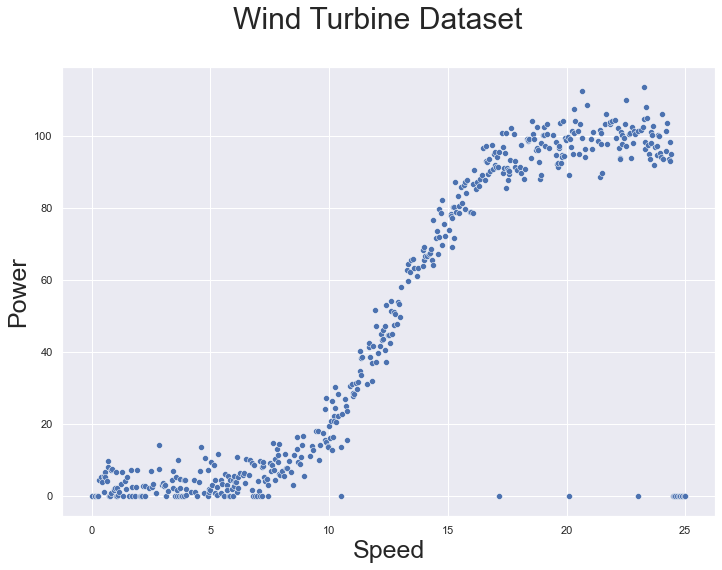

In [31]:
#Plotting of the Data Set on a Scatter Plot
sns.scatterplot(data=wind_turbine_dataset, x="speed", y="power",
    sizes=(250, 250), legend="full")

plt. xlabel("Speed", fontsize=25)
plt. ylabel("Power", fontsize=25)
plt. suptitle("Wind Turbine Dataset", fontsize=30)

**Straight lines, Linear Regression**

All straight lines can be expressed in the form $y = mx + c$. The number $m$ is the slope of the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The number $c$ is the y-intercept of the line. It's the value of $y$ when $x$ is 0.

To fit a straight line to the data, we just must pick values for $m$ and $c$. These are called the parameters of the model, and we want to pick the best values possible for the parameters. That is, the best parameter values given the data observed. Below we show various lines plotted over the data, with different values for $m$ and $c$ [7].

Three possible lines of best fit will now be applied to the model through "guesstimation". 


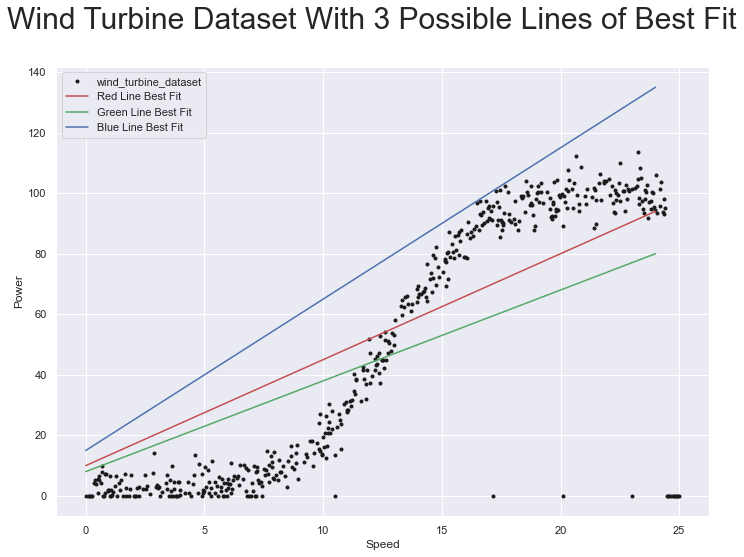

In [48]:
# Plot power versus speed with black dots
plt.plot(wind_turbine_dataset.speed
, wind_turbine_dataset.power, 'k.', label="wind_turbine_dataset")

# Overlay 3 possible lines of best fit on the plot 
x = np.arange(0.0, 25.0, 1.0)
plt.plot(x, 3.5 * x + 10.0, 'r-', label=r"Red Line Best Fit")
plt.plot(x, 3.0 * x +  8.0, 'g-', label=r"Green Line Best Fit")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"Blue Line Best Fit")

# Add a legend
plt.legend()

# Add axis labels
plt.xlabel("Speed")
plt.ylabel("Power")
plt. suptitle("Wind Turbine Dataset With 3 Possible Lines of Best Fit", fontsize=30)
# Show the plot
plt.show()

**Calculating the Cost**

In order to find the best fit line of the three we can calculate the cost of each of the lines. Remember a cost function maps event or values of one or more variables onto a real number. In this case, the event we are finding the cost of is the difference between estimated values, or the difference between the hypothesis and the real values — the actual data we are trying to fit a line to [8].



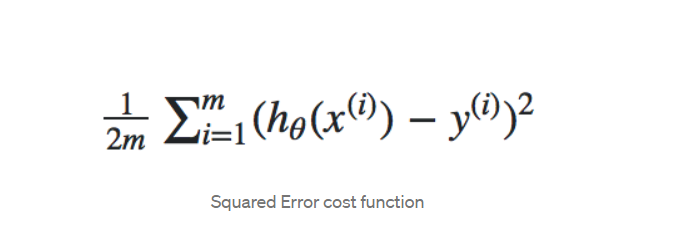

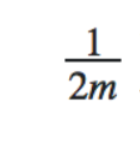

On the far left, we have 1/2*m. m is the number of samples.


Next we have a sigma:

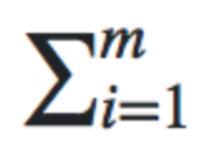

This means the sum. In this case, the sum from i to m, We repeat the calculation to the right of the sigma, that is:

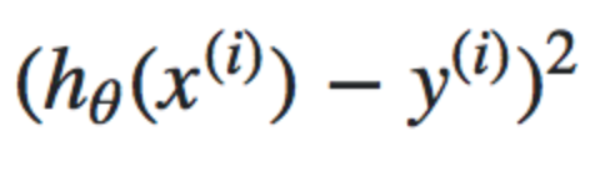

The actual calculation is just the hypothesis value for h(x), minus the actual value of y. Then you square whatever you get.
The final result will be a single number. We repeat this process for all the hypothesis, in this case Red Line Best Fit , Green Line Best Fit and Blue Line Best Fit. Whichever has the lowest result, or the lowest “cost” is the best fit of the three hypothesis [8].

In [ ]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

In [33]:
wind_turbine_dataset.speed


0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
5       0.325
6       0.400
7       0.450
8       0.501
9       0.526
10      0.551
11      0.576
12      0.626
13      0.676
14      0.701
15      0.726
16      0.751
17      0.801
18      0.826
19      0.851
20      0.926
21      0.951
22      0.976
23      1.001
24      1.026
25      1.051
26      1.076
27      1.101
28      1.151
29      1.251
30      1.276
31      1.301
32      1.401
33      1.426
34      1.502
35      1.552
36      1.652
37      1.677
38      1.702
39      1.827
40      1.877
41      1.902
42      2.027
43      2.077
44      2.102
45      2.177
46      2.227
47      2.252
48      2.402
49      2.477
50      2.553
51      2.578
52      2.703
53      2.828
54      2.853
55      2.953
56      3.003
57      3.028
58      3.053
59      3.078
60      3.128
61      3.203
62      3.378
63      3.403
64      3.428
65      3.504
66      3.529
67      3.579
68      3.604
69      3.629
70      3.679
71    

# References


[1] I-Python built-in Magic Commands https://ipython.readthedocs.io/en/stable/interactive/magics.html

[2] Seaborn Controlling figure aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

[3] Chatterjee, S. and Hadi, A.S., 2015. Regression analysis by example. John Wiley & Sons.

[4] Stephanie Glen - Regression Analysis, https://www.statisticshowto.com/probability-and-statistics/regression-analysis/

[5] Draper, N.R. and Smith, H., 1998. Applied regression analysis (Vol. 326). John Wiley & Sons.

[6] Munro, B.H., 2005. Statistical methods for health care research (Vol. 1). lippincott williams & wilkins.

[7] Ian McLoughlin. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

[8] Understanding and Calculating the Cost Function for Linear Regression. https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb
